In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
import calendar

import pandas as pd


%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.


Report with Nelder-Mead 
  final_simplex: (array([[-0.08986599,  0.71268205],
       [-0.08980205,  0.71263734],
       [-0.08978193,  0.71269785]]), array([-1.03162845, -1.03162845, -1.03162842]))
           fun: -1.0316284464752081
       message: 'Optimization terminated successfully.'
          nfev: 77
           nit: 40
        status: 0
       success: True
             x: array([-0.08986599,  0.71268205])

Minimum with Nelder-Mead 
 [-0.08986599  0.71268205]

Value of the function --->  -1.0316284464752081
--------------------------------------------------------------

Report with Powell 
    direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [-6.21111406e-04,  4.70877838e-05]])
     fun: -1.0316284534898421
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 3
  status: 0
 success: True
       x: array([-0.08984201,  0.71265634])

Minimum with Powell 
 [-0.08984201  0.71265634]

Value of the function --->  -1.0316284534898421
-----------------------

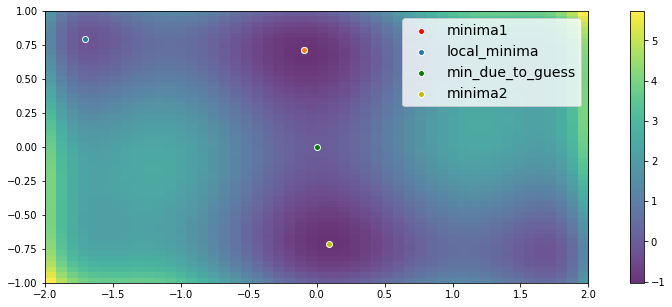

In [2]:
def func(x):
    return ( 4 - (2.1*(x[0]**2)) + ((x[0]**4)/3))*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

x=np.linspace(-2,2)
y=np.linspace(-1,1)


xv, yv = np.meshgrid(x, y , sparse=True)



fig0=plt.figure(figsize=(15,5))
plt.imshow(func([xv, yv]), extent=[-2, 2, -1, 1], origin="lower" , alpha=0.8)
plt.colorbar()

x_min1 = optimize.minimize(func , x0 = [1,1] ,method='Nelder-Mead')
plt.scatter(x_min1.x[0] , x_min1.x[1] , c='r' , edgecolor='w' , label='minima1')

x_min2 = optimize.minimize(func , x0 = [0,0] , method='Powell')
plt.scatter(x_min2.x[0] , x_min2.x[1] , c='C1' , edgecolor='w' )

x_min3 = optimize.minimize(func , x0 = [-1.6,0.5] ,method='CG')
plt.scatter(x_min3.x[0] , x_min3.x[1] ,  edgecolor='w' , label='local_minima')

x_min4 = optimize.minimize(func , x0 = [0,0] , method='BFGS')
plt.scatter(x_min4.x[0] , x_min4.x[1] , c='green' , edgecolor='w' , label='min_due_to_guess')

x_min5 = optimize.minimize(func , x0 = [4,5] ,method='CG')
plt.scatter(x_min5.x[0] , x_min5.x[1] , c='y' , edgecolor='w' , label='minima2')



print("\nReport with Nelder-Mead \n" , x_min1)

print("\nMinimum with Nelder-Mead \n" , x_min1.x)
print("\nValue of the function ---> " ,x_min1.fun)
print("--------------------------------------------------------------")

print("\nReport with Powell \n" , x_min2)

print("\nMinimum with Powell \n" , x_min2.x)
print("\nValue of the function ---> ", x_min2.fun)

print("--------------------------------------------------------------")

print("\nReport with Newton CG \n" , x_min3)

print("\nMinimum with Newton CG \n" , x_min3.x)
print("\nValue of the function ---> ", x_min3.fun)
print("        LOCAL MINIMA DUE TO INITIAL GUESS          ")
print("--------------------------------------------------------------")

print("\nReport with BFGS \n" , x_min4)

print("\nMinimum with BFGS \n" , x_min4.x)
print("\nValue of the function ---> " ,x_min4.fun)
print("        ERROR DUE TO INITIAL GUESS          ")

print("--------------------------------------------------------------")

print("\nReport with Newton CG \n" , x_min5)
print("\nMinimum with Newton CG \n" , x_min5.x)
print("\nValue of the function ---> ", x_min5.fun)

print("--------------------------------------------------------------")

plt.legend(loc="upper right", fontsize=14)


The function has two global minima (the red and the yellow ones), but some of the methods of scipy.optimize.minimize() have a problems if the initial guess is putted as (x,y)=(0,0): in some cases in fact, they wrongly find the minimum in (0,0). Maybe becauase from (0,0) it can't understand the characteristic lenght of the problem that in general is related to the distance from the origin.

Text(0.5, 0.92, 'Six-hump Camelback function')

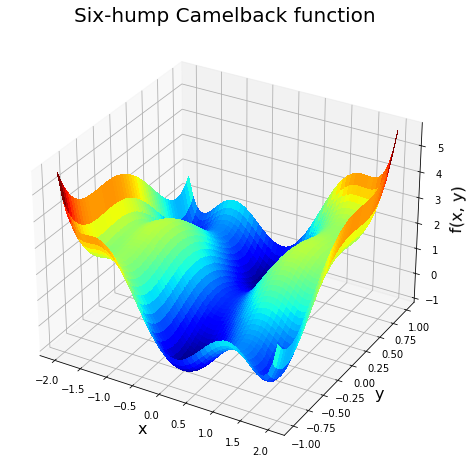

In [3]:

from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure( figsize=(20,8))
ax1 = fig1.add_subplot(111, projection='3d')
surf = ax1.plot_surface(xv, yv, func([xv, yv]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax1.set_xlabel('x' , fontsize=16)
ax1.set_ylabel('y' , fontsize=16)
ax1.set_zlabel('f(x, y)' , fontsize=16)
ax1.set_title('Six-hump Camelback function' , fontsize=20)



2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

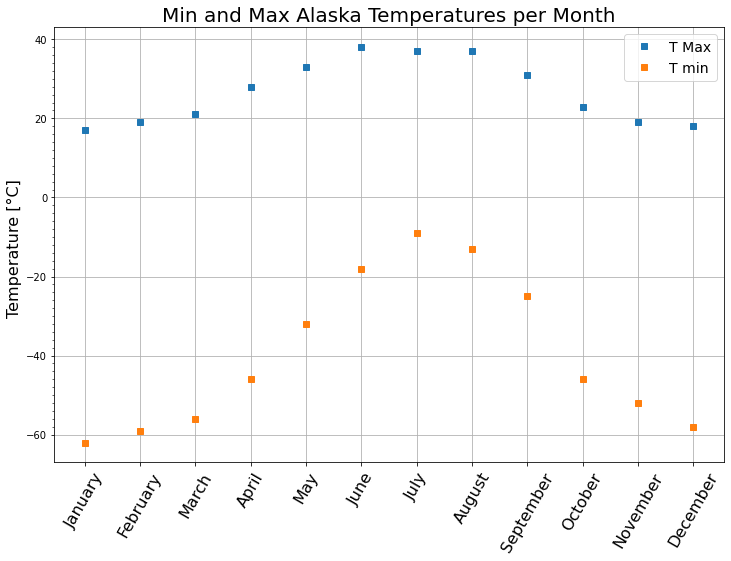

In [18]:

T_max= np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
T_min= np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

n_month=[x for x in range(0,12)]


fig1 , ax1 = plt.subplots(figsize=(12,8))

ax1.plot(calendar.month_name[1:] , T_max , marker ='s' , linestyle='none', label='T Max')
ax1.plot(calendar.month_name[1:] , T_min , marker ='s' , linestyle='none',  label='T min')
ax1.set_title("Min and Max Alaska Temperatures per Month", fontsize=20)
ax1.set_ylabel("Temperature [°C] " , fontsize=16)
ax1.tick_params(axis='x', which='major', labelsize=16, rotation=60 )
ax1.grid()
ticks=[i for i in range(np.min(T_min +2), np.max(T_max +1),2)]
ax1.set_yticks(ticks , minor=True)
ax1.legend(loc='best', fontsize=14)



Time offset for T max: 5.74 +- 0.08
Time offset for T min: 6.16 +- 0.05

 Compability : 4.6 sigma => they are not the same within the fit accuracy


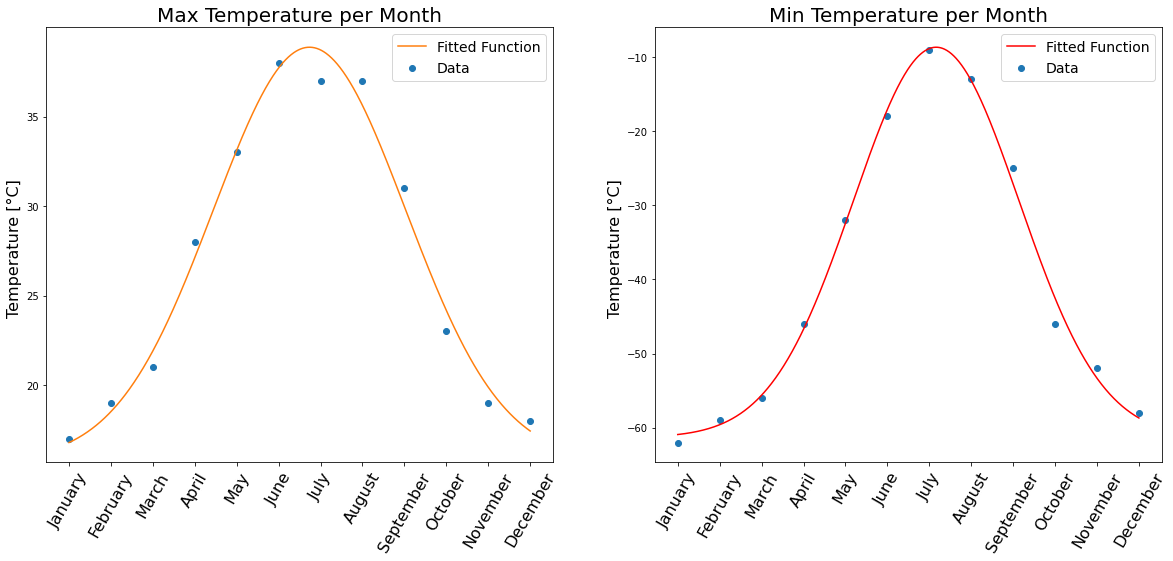

In [20]:

fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(20,8))

ax[0].scatter(calendar.month_name[1:] , T_max , label='Data')
ax[0].set_title("Max Temperature per Month", fontsize=20)
ax[0].set_ylabel("Temperature [°C] " , fontsize=16)
ax[0].tick_params(axis='x', which='major', labelsize=16, rotation=60 )

ax[1].scatter(calendar.month_name[1:] , T_min , label='Data')
ax[1].set_title("Min Temperature per Month", fontsize=20)
ax[1].set_ylabel("Temperature [°C] " , fontsize=16)
ax[1].tick_params(axis='x', which='major', labelsize=16, rotation=60 )




def gaussian(x, A , mean , std , offset):
    return A * np.exp( - ((x - mean) **2 /(2*std**2))) + offset


x = np.linspace(0,11,1000)


popt_max , pcov_max  = optimize.curve_fit(gaussian, n_month, T_max, p0=[40, 7, 4, 0], full_output=False)

popt_min, pcov_min = optimize.curve_fit(gaussian, n_month, T_min , p0=[50, 7, 4, -60], full_output=False)




ax[0].plot(x, gaussian(x, *popt_max), color='C1', label='Fitted Function')
ax[0].legend(loc='best', fontsize=14)


ax[1].plot(x, gaussian(x, *popt_min), color='r', label='Fitted Function')
ax[1].legend(loc='best', fontsize=14)

# Is the time offset for min and max temperatures the same within the fit accuracy?
print("Time offset for T max: %4.2f +- %4.2f" %(popt_max[1], np.sqrt(pcov_max[1,1])))
print("Time offset for T min: %4.2f +- %4.2f" %(popt_min[1], np.sqrt(pcov_min[1,1])))


comp = abs(popt_max[1] - popt_min[1])/np.sqrt(pcov_max[1,1] + pcov_min[1,1])

print("\n Compability : %3.1f sigma => they are not the same within the fit accuracy"%(comp))



In [21]:
# fit reasonable?

residuals = T_max - (gaussian(n_month, *popt_max))

ssr = np.sum(residuals**2)
tss = np.sum( (T_max - np.mean(T_max))**2 )

r_squared_max = 1 - (ssr/tss)


residuals = T_min - (gaussian(n_month , *popt_min))

ssr = np.sum(residuals**2)
tss = np.sum( (T_min - np.mean(T_min))**2 )

r_squared_min = 1 - (ssr/tss)


print("Goodness of the fit: looking at R^2: \n T_max --> ", r_squared_max , " \n T_min --> ", r_squared_min)
print("\n It seems reasonable ")

Goodness of the fit: looking at R^2: 
 T_max -->  0.9858796078362773  
 T_min -->  0.9946041936397239

 It seems reasonable 


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [6]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P /home/ilazza/LaboratoryOfComputationalPhysics_Y4/dataEs8/

--2021-12-16 11:02:48--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [segue]
--2021-12-16 11:02:49--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc765824d26e1b24ba0760645f53.dl.dropboxusercontent.com/cd/0/inline/Bb8ANVH8UXfykwZ5jyvCDGjnNrZ5HWaBp10J1nvK5TnrXzNp4kOlIyft5d8KmLsNd5Lp7LnkmRwFyix5BcYpVf556kut33Oglsoay-1lwu88ylPYaCNMRGWffdKlAbRMoD9BPLREap7NU_uz54HUG4dw/file# [segue]
--2021-12-16 11:02:49--  https://uc765824d26e1b24ba0760645f53.dl.dropboxusercontent.com/cd/0/inline/Bb8ANVH8UXfykwZ5jyvCDGjnNrZ5HWaBp10J1nvK5TnrXz

In [23]:
#Another way that could be useful
#data = pd.DataFrame(pd.read_pickle("residuals_261.pkl").flatten()[0])
#data_res = data['residuals']


file_name='/home/ilazza/LaboratoryOfComputationalPhysics_Y4/dataEs8/residuals_261.pkl'

data = np.load(file_name , allow_pickle=True)

dataf=pd.DataFrame.from_dict(data.item())

dataf


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


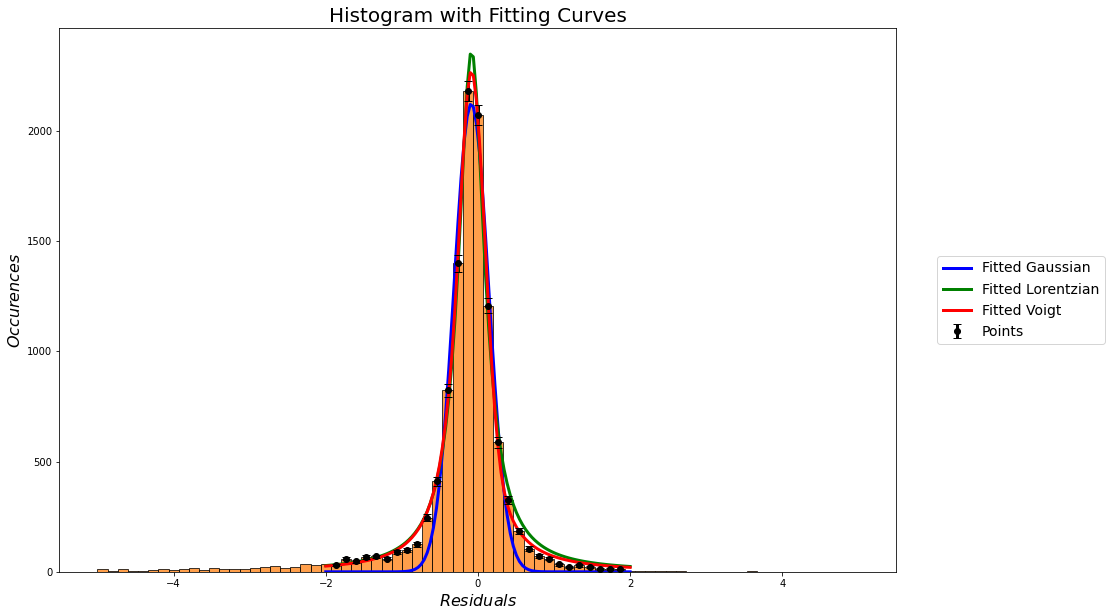

In [24]:
#Considering only the "residuals" feature, 
#create an histogram with the appropriate binning and display it.


fig , ax = plt.subplots( figsize=(15,10))

ax.set_title('Histogram with Fitting Curves' , fontsize = 20)
ax.set_xlabel('$Residuals$' , fontsize = 16)
ax.set_ylabel('$Occurences$' , fontsize = 16)


counts, bins , _ = ax.hist(dataf['residuals'], bins=75 , range=(-5,5) , alpha=0.75 , color='C1', edgecolor='black')

#Set the appropriate Poisson uncertainty for each bin 
#(thus, for each bin , 𝜎𝑖 =sqrt(ni) , where  ni is the number of entries in each bin)


x_pos = np.array([(x1+x2)*0.5 for x1, x2 in zip(bins[:-1], bins[1:])])
err = np.array([np.sqrt(n) for n in counts])
counts= np.array(counts)



#By looking at the distribution of the residuals, 
#define an appropriate function and fit it to the histogram of the residuals

#choose a range
ind = np.array([ p for p in range (len(x_pos)) if ( -2 < x_pos[p] < 2)])

x_pos = x_pos[ind]
counts = counts[ind]
err = err[ind]


#choose a curve to fit

def gaussian(x, A , mean , std ):
    return A * np.exp( - ((x - mean) **2 /(2*std**2)))

def lorentzian(x, A, x0, gamma):
    return A*gamma**2/(gamma**2+(x-x0)**2)

def voigt(x, amplG, mu, std, amplL, x0, gamma):
    return gaussian(x, amplG, mu, std)+lorentzian(x, amplL, x0, gamma)



popt_gauss , pcov_gauss  = optimize.curve_fit(gaussian, x_pos, counts, p0=[1600, 0, 1])

popt_lor, pcov_lor = optimize.curve_fit(lorentzian, x_pos, counts , p0=[1600, 0, 1])

popt_voigt, pcov_voigt = optimize.curve_fit(voigt, x_pos, counts, p0=[1000, 0, 1, 60, 0, 1])


x = np.linspace(-2, 2, 100)

ax.plot(x, gaussian(x, *popt_gauss), color='b', lw=3, label='Fitted Gaussian')
ax.plot(x, lorentzian(x, *popt_lor), color='g', lw=3, label='Fitted Lorentzian')
ax.plot(x, voigt(x, *popt_voigt), color='r', lw=3, label='Fitted Voigt')
ax.errorbar(x_pos, counts, err, fmt='o', c='black', ecolor='black', elinewidth=3, capsize=4 , label='Points')

ax.legend(loc='center left' , bbox_to_anchor=(1.04 , 0.5) , fontsize=14)




n Degrees of Freedom = 23
chi2 = 233.6835071480627
p-value = 0.0


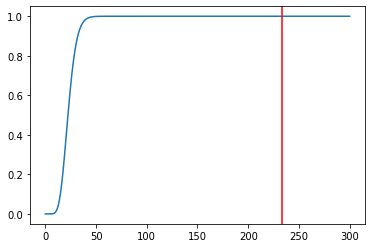

In [25]:
#Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

ndof = len(x_pos) - 6
print("n Degrees of Freedom =", ndof)

# calculate the chi^2
chi2 = np.sum( ((counts - voigt(x_pos , *popt_voigt))**2) / err**2 )
print("chi2 =", chi2)


# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory


x = np.linspace(0,300,1000)

plt.plot(x, stats.chi2.cdf(x, df=ndof))
plt.fill_between(x_pos, counts, where=(x_pos > chi2), color='lightblue')
plt.axvline(chi2, color='r')

The P value is too small (is even equal to 0), the fit is considered unsatisfactory, also the chi2 is too big due to a high squared sum of the residuals.

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [6]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P /home/ilazza/LaboratoryOfComputationalPhysics_Y4/dataEs8/

--2021-12-16 15:40:32--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [segue]
--2021-12-16 15:40:33--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc2632706a20c9eb084141c46297.dl.dropboxusercontent.com/cd/0/inline/Bb-8Oj6BELP8yAyci7bZbsZFsxTpHNdtqKZ-TrhoZnaDkGIETBbD52wqxK3M6kMn5-wENVp6NQpoq7GEZZmqCfPQ5JZmW6oxiS5yJe0jdGLuv-xuIWYOS_bytlNquLT4t8YYMY52EmSCss_JF8w0bykt/file# [segue]
--2021-12-16 15:40:34--  https://uc2632706a20c9eb084141c46297.

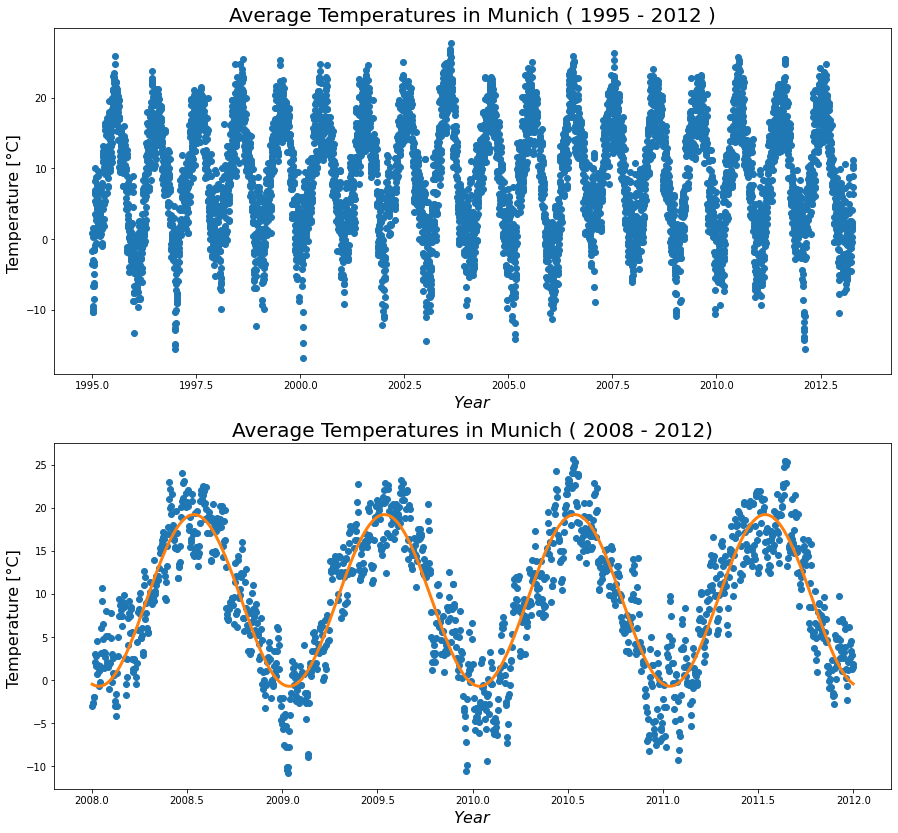

In [33]:
#Another way that could be useful
#data = pd.read_csv("munich_temperatures_average_with_bad_data.txt", sep=' ', names=['time','temp'])


file_name='/home/ilazza/LaboratoryOfComputationalPhysics_Y4/dataEs8/munich_temperatures_average_with_bad_data.txt'

date , Temp = np.loadtxt(file_name , unpack=True) 

fig , ax = plt.subplots(nrows = 2 , ncols = 1 , figsize=(15,14))

#fitting function

def fit_f (t , a , b , c):
    return a*np.cos(t*2*np.pi +b)+c


#Make a plot of the data and the best-fit model in the range 2008 to 2012.
#remove the outliers first and select a specific range

indx = np.abs(Temp) < 90
date = date[indx]
Temp = Temp[indx]



ax[0].scatter(date , Temp , label='Data')
ax[0].set_title("Average Temperatures in Munich ( 1995 - 2012 )", fontsize=20)
ax[0].set_ylabel("Temperature [°C] " , fontsize=16)
ax[0].set_xlabel("$Year$" , fontsize=16)


indx = np.array([d for d in range(len(date)) if 2008 <= date[d] <= 2012])
time = date[indx]
T= Temp[indx]


ax[1].scatter(time , T , label='Data')
ax[1].set_title("Average Temperatures in Munich ( 2008 - 2012)", fontsize=20)
ax[1].set_ylabel("Temperature [°C] " , fontsize=16)
ax[1].set_xlabel("$Year$" , fontsize=16)

popt_f , pcov_f  = optimize.curve_fit(fit_f, time, T, p0=[17 , 0 , 6])

ax[1].plot(time, fit_f(time, *popt_f), color='C1', lw=3, label='Fitted Function')



In [73]:
#What are the best-fit values of the parameters?

print("The best-fit parameters are : \n  a = %.4f , b = %.4f , c = %.4f" %(popt_f[0] , popt_f[1] , popt_f[2]))
print("\nSo the best-fit function is -->  𝑓 (𝑥) = (%.4f) * cos( 2*pi * 𝑥 %.4f ) + %.4f "%(popt_f[0] , popt_f[1] , popt_f[2]))


#What is the overall average temperature in Munich, 
#and what are the typical daily average values predicted by the model for the coldest 
#and hottest time of year?

print("\nThe overall average Temperature in Munich is %3.2f °C " %(np.mean(Temp)))
print("Coldest time of the year in Munich : Measured T %3.2f °C  vs Predicted T %3.2f °C" %(np.min(Temp) , fit_f(date[np.argmin(Temp)] , *popt_f)))
print("Hottest time of the year in Munich : Measured T %3.2f °C  vs Predicted T %3.2f °C" %(np.max(Temp) , fit_f(date[np.argmax(Temp)] , *popt_f)))


#What is the meaning of the  𝑏  parameter, and what physical sense does it have?

print("\nThe b parameter (the phase shift) corresponds to the horizontal shift of the temperature distribution \nso 𝑏 matches the Temperature to the correct period of the year.")
print("With the correct 𝑏 have as a result a low temperature in winter for half of the year and \na high T for the other half during summer")

The best-fit parameters are : 
  a = -9.9620 , b = -0.2346 , c = 9.2628

So the best-fit function is -->  𝑓 (𝑥) = (-9.9620) * cos( 2*pi * 𝑥 -0.2346 ) + 9.2628 

The overall average Temperature in Munich is 8.93 °C 
Coldest time of the year in Munich : Measured T -16.78 °C  vs Predicted T -0.51 °C
Hottest time of the year in Munich : Measured T 27.67 °C  vs Predicted T 18.03 °C

The b parameter (the phase shift) corresponds to the horizontal shift of the temperature distribution 
so 𝑏 matches the Temperature to the correct period of the year.
With the correct 𝑏 have as a result a low temperature in winter for half of the year and 
a high T for the other half during summer


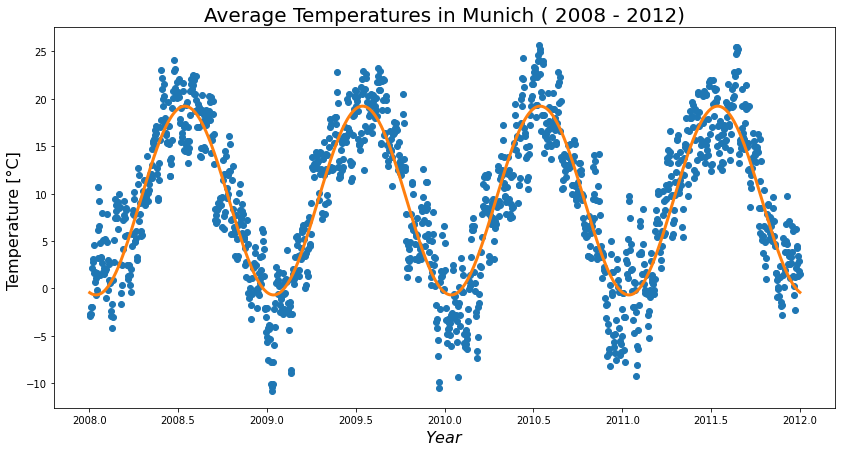

In [71]:
#Now fit the data with the function  𝑔(𝑥) , which has 1 more parameter than  𝑓(𝑥) .

 
#fitting function

def fit_g (t , a , b , c , d):
    return a*np.cos(t*2*np.pi*b +c )+d    
    
popt_g , pcov_g  = optimize.curve_fit(fit_g, time, T, p0=[17 , 1 ,  0 , 6])

fig3 ,ax3 = plt.subplots(figsize=(14,7))
ax3.scatter(time , T , label='Data')
ax3.set_title("Average Temperatures in Munich ( 2008 - 2012)", fontsize=20)
ax3.set_ylabel("Temperature [°C] " , fontsize=16)
ax3.set_xlabel("$Year$" , fontsize=16)
    
ax3.plot(time, fit_g(time, *popt_g), color='C1', lw=3, label='Fitted Function')




In [74]:
print("The best-fit parameters are : \n  a = %.4f , b = %.4f , c = %.4f , d=%.4f" %(popt_g[0] , popt_g[1] , popt_g[2] , popt_g[3]))
print("\nSo the best-fit function is --> 𝑔(𝑥) =(%.4f) * cos( 2*pi * 𝑥 *%.4f  %.4f ) + %.4f "%(popt_g[0] , popt_g[1] , popt_g[2] , popt_g[3]))

The best-fit parameters are : 
  a = -9.9608 , b = 1.0003 , c = -3.9390 , d=9.2657

So the best-fit function is --> 𝑔(𝑥) =(-9.9608) * cos( 2*pi * 𝑥 *1.0003  -3.9390 ) + 9.2657 


In [78]:
#What are the RSS for  𝑓(𝑥)  and  𝑔(𝑥) ?

rss_f = np.sum( (T - fit_f(time , *popt_f))**2 )

rss_g = np.sum( (T - fit_g(time , *popt_g))**2 )

print("RSS for 𝑓(𝑥): %3.2f, RSS for 𝑔(𝑥):  %3.2f "%(rss_f, rss_g))



#Use the Fisher F-test to determine whether the additional parameter is necessary.

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


CL_f_vs_g = Ftest(rss_f , rss_g , 3-1 , 4-1 , len(time) , verbose=True)


RSS for 𝑓(𝑥): 18669.52, RSS for 𝑔(𝑥):  18669.23 
CL: 0.880 , additional parameter necessary: NO


An additional parameter to the fitting function does not improve the performances